# Install Spark

In [ ]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

# **Explicitly set PYSPARK_SUBMIT_ARGS**
# This addresses the "Java gateway process exited before sending its port number" issue by providing specific options to the Spark execution environment.
os.environ["PYSPARK_SUBMIT_ARGS"] = "--master local[*] --driver-memory 1g --executor-memory 1g pyspark-shell"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,546 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


# **Data Preprocessing**

In [ ]:
file_path = '/content/drive/MyDrive/Bigdata/Combined_Flights_2021.csv'

df_2021 = spark.read \
    .option("header", True) \
    .option("inferSchema", True) \
    .csv(file_path)

df_2021.printSchema()
df_2021.show(5)

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)


In [ ]:
type(df_2021)


pyspark.sql.dataframe.DataFrame

In [ ]:
file_path_2022 = '/content/drive/MyDrive/Bigdata/Combined_Flights_2022.csv'

df_2022 = spark.read \
    .option("header", True) \
    .option("inferSchema", True) \
    .csv(file_path_2022)

df_2022.printSchema()
df_2022.show(5)

root
 |-- FlightDate: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)


In [ ]:
print(df_2021.columns)
print(df_2022.columns)


['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups'

In [ ]:
from pyspark.sql.functions import col

df_2021 = df_2021.withColumn("DivAirportLandings", col("DivAirportLandings").cast("double"))


In [ ]:
set(df_2021.columns) - set(df_2022.columns)
set(df_2022.columns) - set(df_2021.columns)


set()

In [ ]:
df_combined = df_2022.unionByName(df_2021)


In [ ]:
columns_to_drop = [
    'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
    'Tail_Number', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline',
    'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
    'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
    'OriginStateFips', 'OriginWac', 'DestStateFips', 'DestWac',
    'OriginStateName', 'DestStateName',
    'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
    'CRSArrTime', 'ArrTime', 'WheelsOff', 'WheelsOn',
    'DivAirportLandings', 'ActualElapsedTime', 'CRSElapsedTime'
]

df_cleaned = df_combined.drop(*columns_to_drop)


In [ ]:
print("Number of columns:", len(df_cleaned.columns))
print("Number of rows:", df_cleaned.count())


Number of columns: 33
Number of rows: 10390189


# Time-Series & Delay-Based EDA

<ipython-input-12-d17ee791a7ac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="AvgDepDelay", data=month_delay_df, palette="Blues_d")


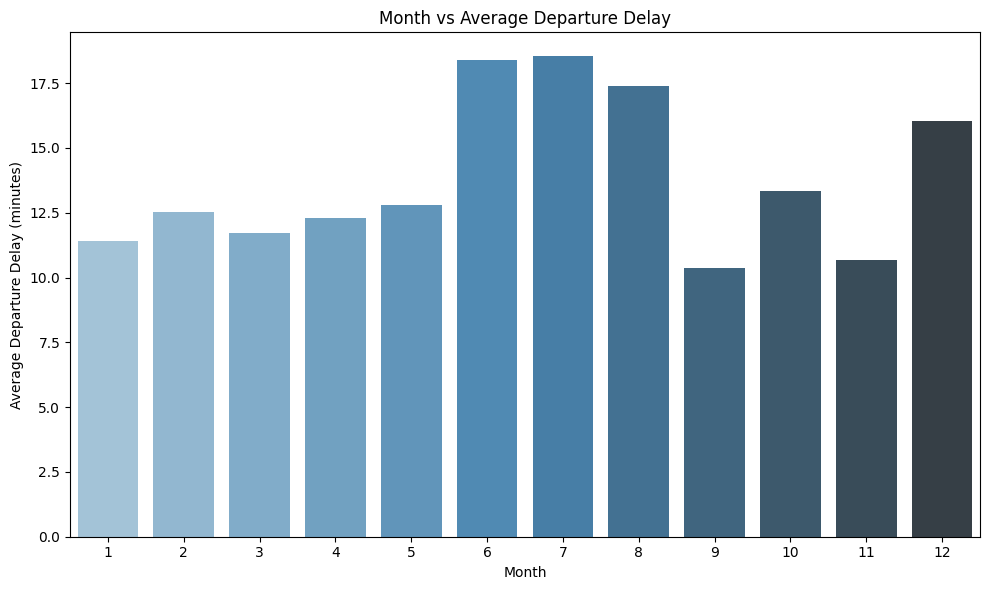

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Aggregate average departure delay by Month
month_delay_df = df_cleaned.groupBy("Month")\
    .agg(F.mean("DepDelayMinutes").alias("AvgDepDelay"))\
    .orderBy("Month")\
    .toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="AvgDepDelay", data=month_delay_df, palette="Blues_d")
plt.title("Month vs Average Departure Delay")
plt.xlabel("Month")
plt.ylabel("Average Departure Delay (minutes)")
plt.tight_layout()
plt.show()


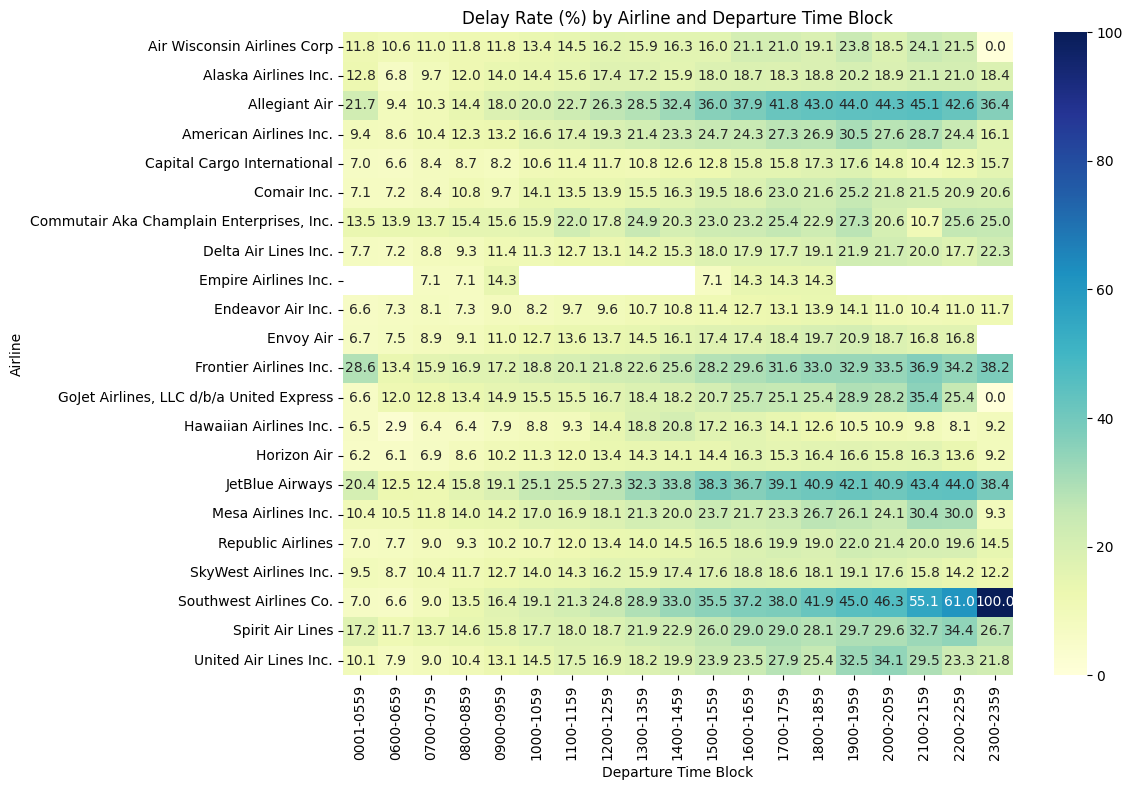

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Aggregate delay rate
delay_rate_df = df_cleaned.groupBy("Airline", "DepTimeBlk") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Pivot for heatmap
pivot_df = delay_rate_df.pivot(index="Airline", columns="DepTimeBlk", values="DelayRate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Delay Rate (%) by Airline and Departure Time Block")
plt.ylabel("Airline")
plt.xlabel("Departure Time Block")
plt.tight_layout()
plt.show()

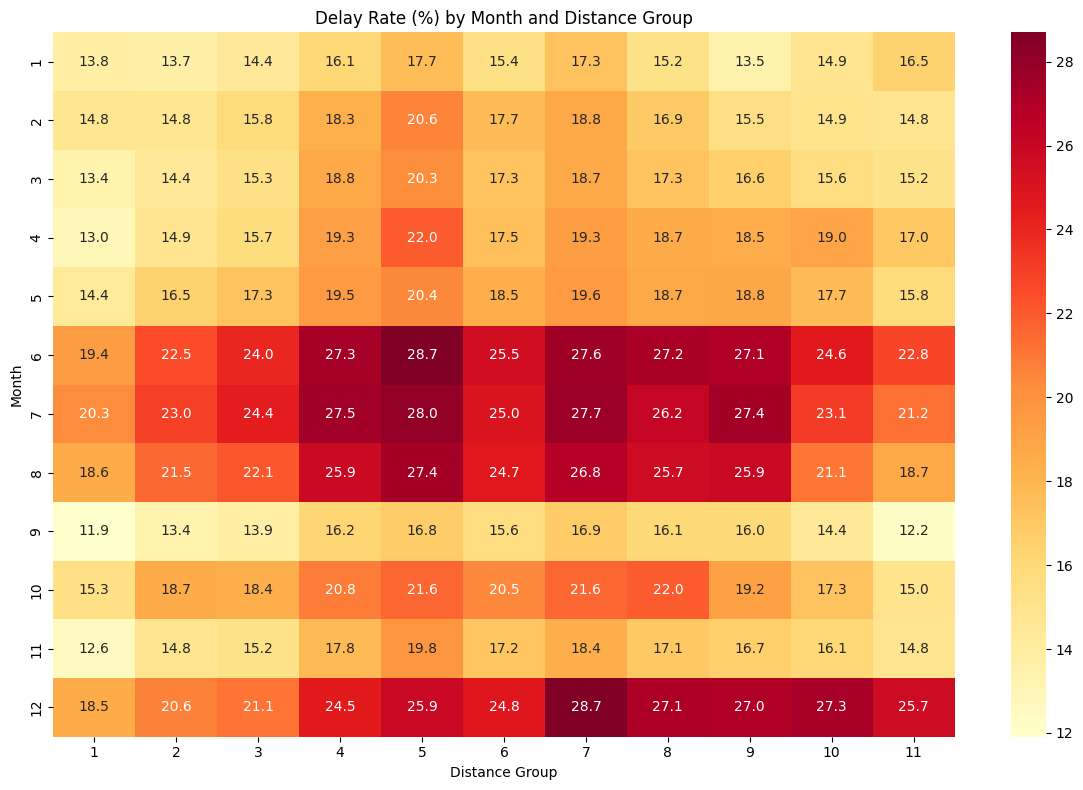

In [ ]:
# Aggregate delay rate
delay_month_distance_df = df_cleaned.groupBy("Month", "DistanceGroup") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Pivot for heatmap
pivot_df = delay_month_distance_df.pivot(index="Month", columns="DistanceGroup", values="DelayRate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Delay Rate (%) by Month and Distance Group")
plt.ylabel("Month")
plt.xlabel("Distance Group")
plt.tight_layout()
plt.show()

<ipython-input-13-85887e5ff2b1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Quarter", y="AvgDepDelay", data=quarter_delay_df, palette="Purples_d")


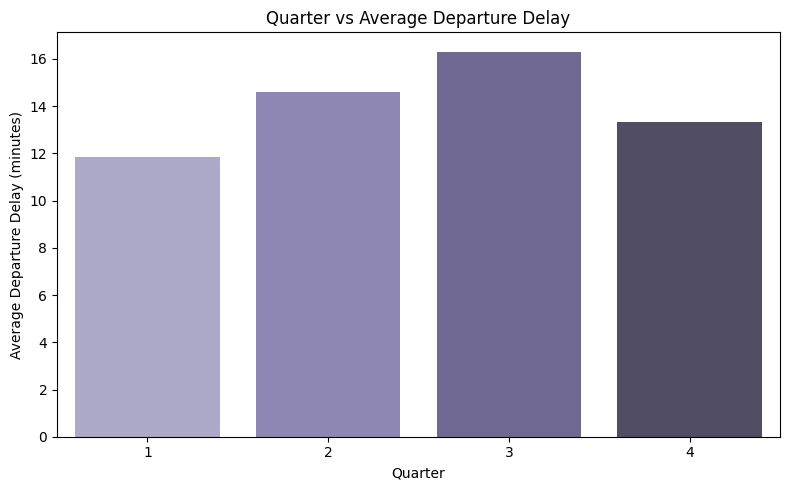

In [ ]:
# Aggregate average departure delay by Quarter
quarter_delay_df = df_cleaned.groupBy("Quarter")\
    .agg(F.mean("DepDelayMinutes").alias("AvgDepDelay"))\
    .orderBy("Quarter")\
    .toPandas()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Quarter", y="AvgDepDelay", data=quarter_delay_df, palette="Purples_d")
plt.title("Quarter vs Average Departure Delay")
plt.xlabel("Quarter")
plt.ylabel("Average Departure Delay (minutes)")
plt.tight_layout()
plt.show()


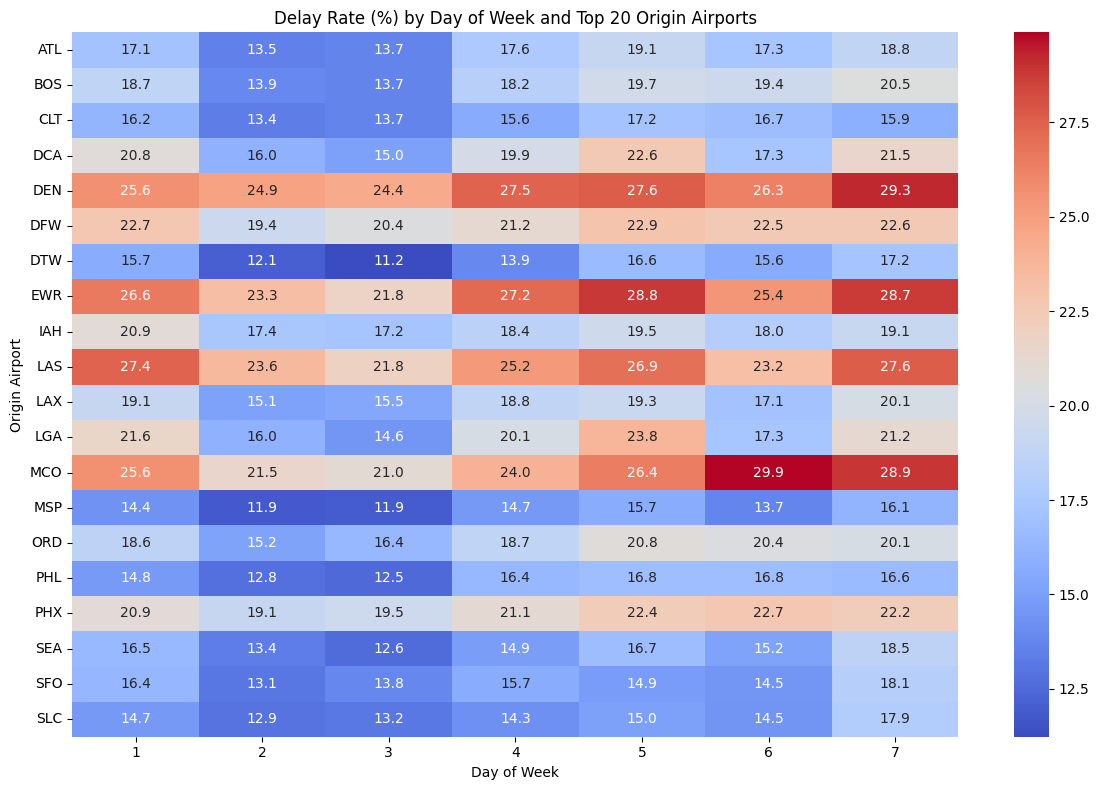

In [ ]:
# Find top 20 busiest airports
top_airports = df_cleaned.groupBy("Origin") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(20) \
    .toPandas()["Origin"].tolist()

# Filter the dataset for only these airports
filtered_df = df_cleaned.filter(F.col("Origin").isin(top_airports))

# Re-aggregate and plot again
delay_day_origin_df = filtered_df.groupBy("DayOfWeek", "Origin") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Pivot for heatmap
pivot_df = delay_day_origin_df.pivot(index="Origin", columns="DayOfWeek", values="DelayRate")

# Plot again
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Delay Rate (%) by Day of Week and Top 20 Origin Airports")
plt.ylabel("Origin Airport")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.show()

<ipython-input-14-72498edd31e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="AvgDepDelay", data=dow_delay_df, palette="Greens_d")


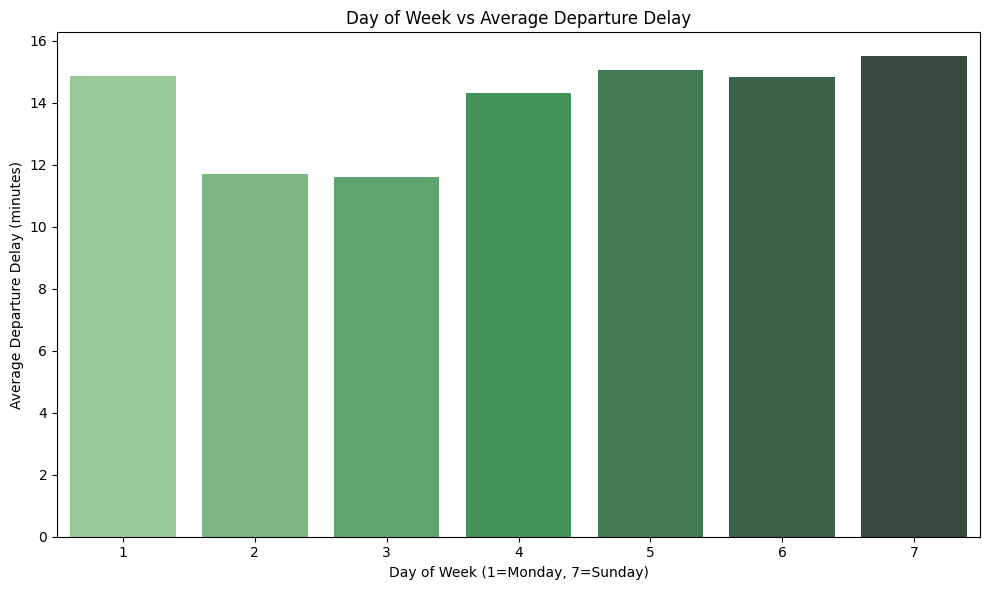

In [ ]:
# Aggregate average departure delay by DayOfWeek
dow_delay_df = df_cleaned.groupBy("DayOfWeek")\
    .agg(F.mean("DepDelayMinutes").alias("AvgDepDelay"))\
    .orderBy("DayOfWeek")\
    .toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="DayOfWeek", y="AvgDepDelay", data=dow_delay_df, palette="Greens_d")
plt.title("Day of Week vs Average Departure Delay")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Departure Delay (minutes)")
plt.tight_layout()
plt.show()


<ipython-input-15-770c4ef77572>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DepTimeBlk", y="AvgDepDelay", data=depblk_delay_df, palette="Oranges_d")


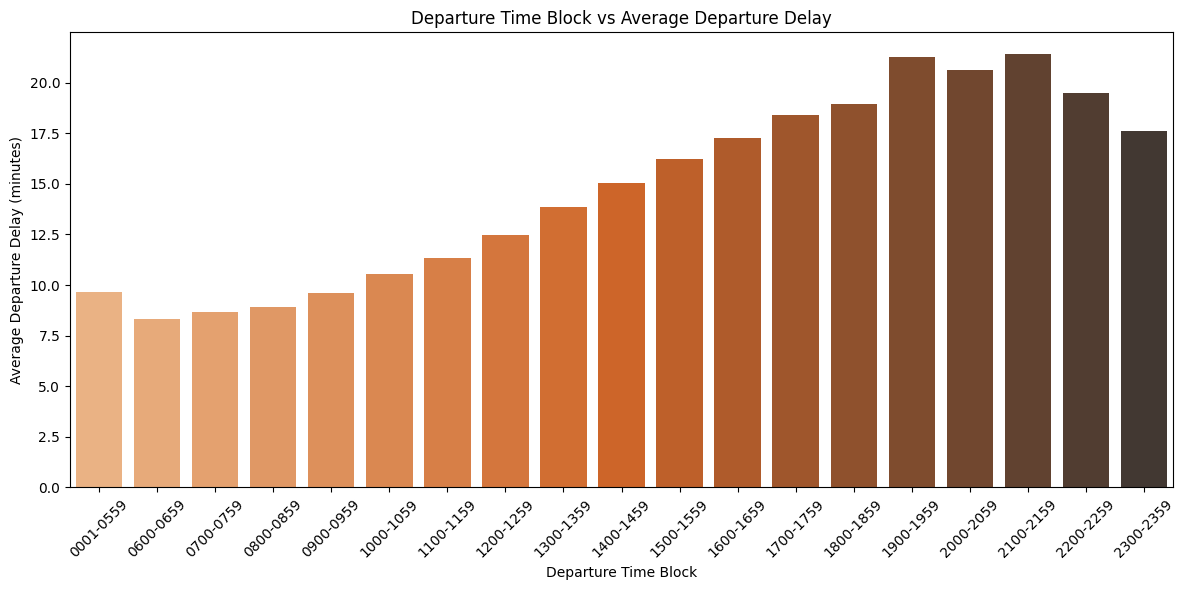

In [ ]:
# Aggregate average departure delay by DepTimeBlk
depblk_delay_df = df_cleaned.groupBy("DepTimeBlk")\
    .agg(F.mean("DepDelayMinutes").alias("AvgDepDelay"))\
    .orderBy("DepTimeBlk")\
    .toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="DepTimeBlk", y="AvgDepDelay", data=depblk_delay_df, palette="Oranges_d")
plt.title("Departure Time Block vs Average Departure Delay")
plt.xlabel("Departure Time Block")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
taxiout_df = df_cleaned.select("TaxiOut", "DepDel15").dropna().sample(fraction=0.01).toPandas()


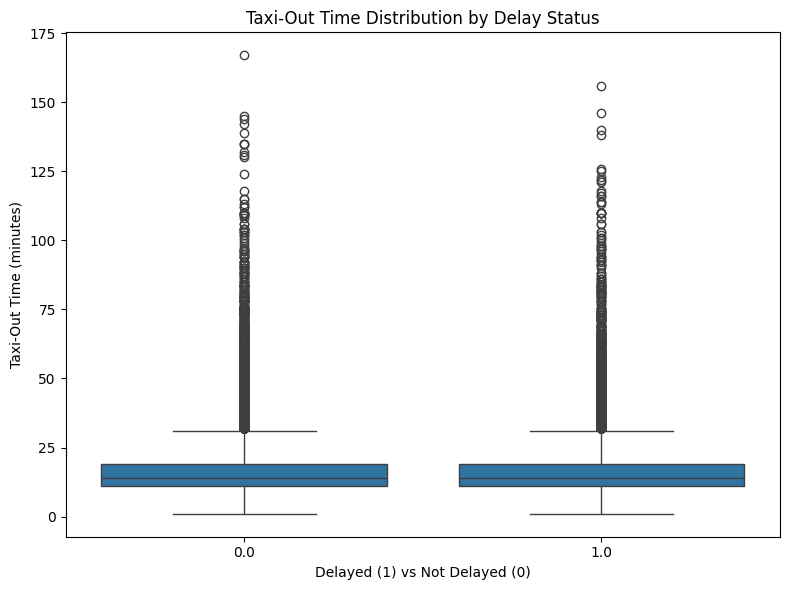

In [ ]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="DepDel15", y="TaxiOut", data=taxiout_df)
plt.title("Taxi-Out Time Distribution by Delay Status")
plt.xlabel("Delayed (1) vs Not Delayed (0)")
plt.ylabel("Taxi-Out Time (minutes)")
plt.tight_layout()
plt.show()

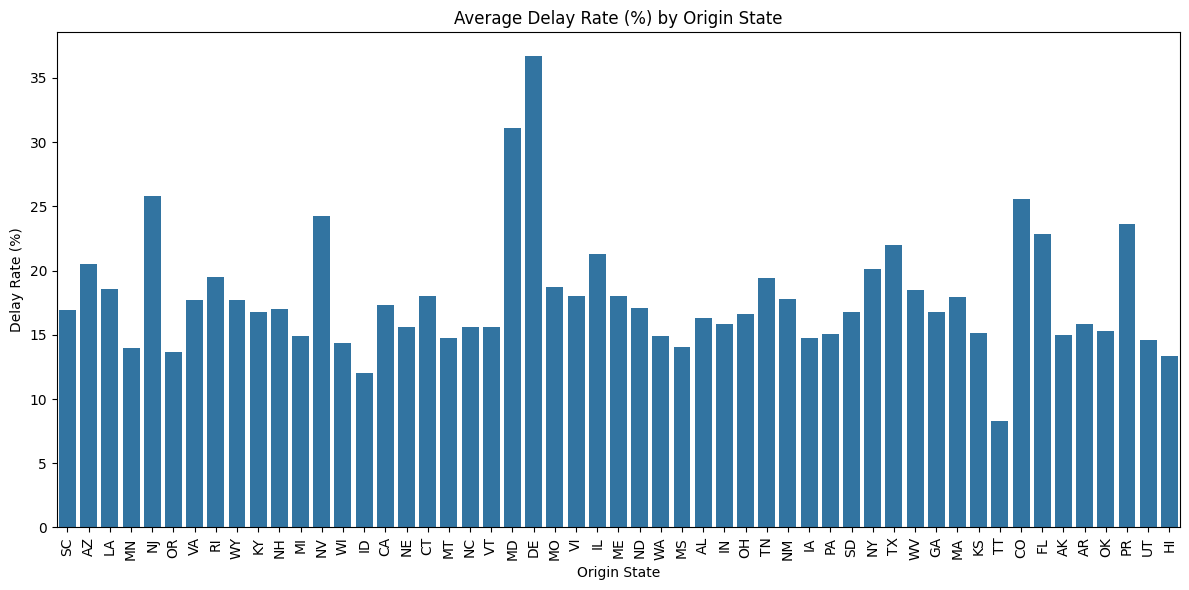

In [ ]:
# Aggregate delay rate
delay_state_df = df_cleaned.groupBy("OriginState") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="OriginState", y="DelayRate", data=delay_state_df)
plt.title("Average Delay Rate (%) by Origin State")
plt.xlabel("Origin State")
plt.ylabel("Delay Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

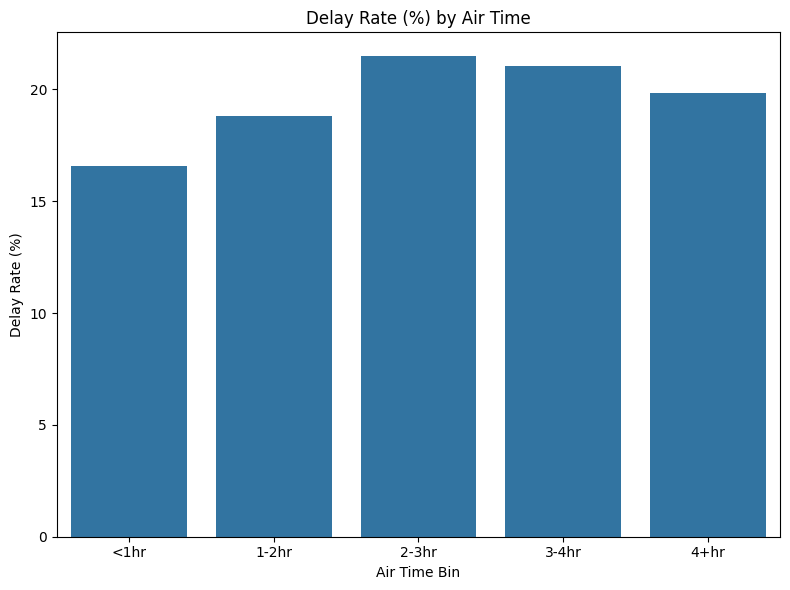

In [ ]:
# Create AirTime bins
df_binned = df_cleaned.withColumn("AirTimeBin", F.when(F.col("AirTime") < 60, "<1hr")
                                  .when((F.col("AirTime") >= 60) & (F.col("AirTime") < 120), "1-2hr")
                                  .when((F.col("AirTime") >= 120) & (F.col("AirTime") < 180), "2-3hr")
                                  .when((F.col("AirTime") >= 180) & (F.col("AirTime") < 240), "3-4hr")
                                  .otherwise("4+hr"))

# Aggregate delay rate
delay_airtime_df = df_binned.groupBy("AirTimeBin") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="AirTimeBin", y="DelayRate", data=delay_airtime_df, order=["<1hr", "1-2hr", "2-3hr", "3-4hr", "4+hr"])
plt.title("Delay Rate (%) by Air Time")
plt.xlabel("Air Time Bin")
plt.ylabel("Delay Rate (%)")
plt.tight_layout()
plt.show()

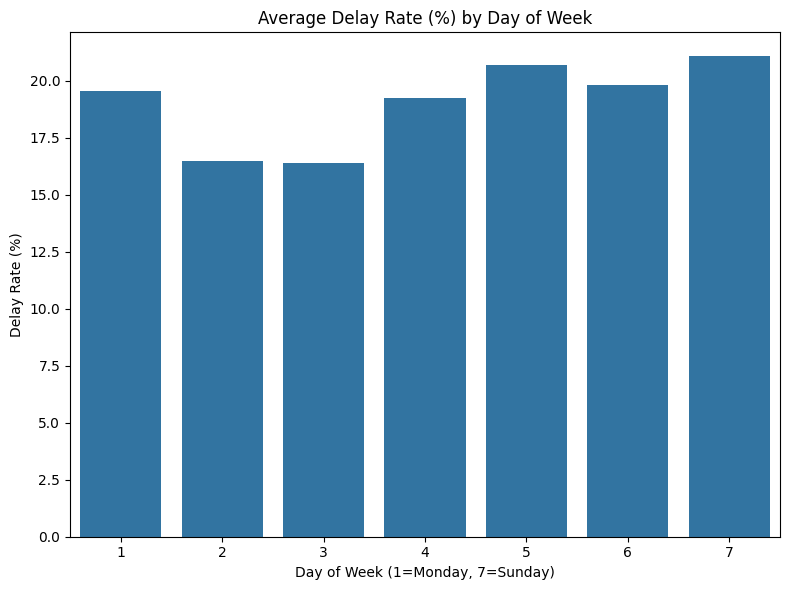

In [ ]:
# Aggregate delay rate
delay_day_df = df_cleaned.groupBy("DayOfWeek") \
    .agg((F.mean("DepDel15") * 100).alias("DelayRate")) \
    .toPandas()

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="DayOfWeek", y="DelayRate", data=delay_day_df)
plt.title("Average Delay Rate (%) by Day of Week")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Delay Rate (%)")
plt.tight_layout()
plt.show()

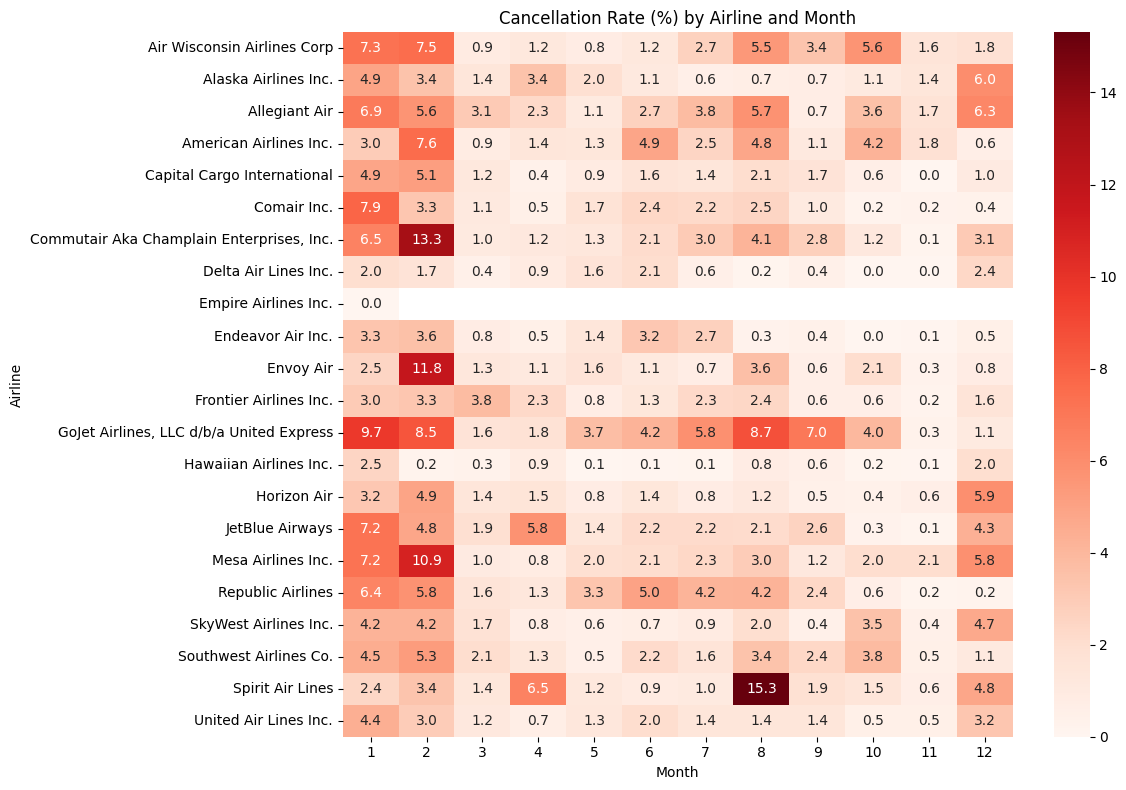

In [ ]:
# Aggregate cancellation rate
cancel_rate_df = df_cleaned.groupBy("Airline", "Month") \
    .agg((F.mean(F.col("Cancelled").cast("integer")) * 100).alias("CancelRate")) \
    .toPandas()

# Pivot for heatmap
pivot_df = cancel_rate_df.pivot(index="Airline", columns="Month", values="CancelRate")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="Reds")
plt.title("Cancellation Rate (%) by Airline and Month")
plt.ylabel("Airline")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


## Verifying Columnar Content

In [ ]:
# prompt: show 20 rows where DepDelayMinutes is not 0.0

df_cleaned.filter(col("DepDelayMinutes") != 0.0).show(20)


+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+---------------+-------+--------+----+-------+-----+----------+---------+-----------------+--------------+-----------+------------------+---------+--------+--------------------+----------+-------+------+--------+--------+------------------+----------+-------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrDelayMinutes|AirTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Operating_Airline|OriginCityName|OriginState|      DestCityName|DestState|DepDel15|DepartureDelayGroups|DepTimeBlk|TaxiOut|TaxiIn|ArrDelay|ArrDel15|ArrivalDelayGroups|ArrTimeBlk|DistanceGroup|
+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+---------------+-------+--------+----+-------+-----+----------+---------+-----------------+--------------+-----------+------------------+-------

## Adding Synthesized Economic Loss Data

In [ ]:
from pyspark.sql.functions import col, when, lit, round
# Create EstimatedPassengers
df_cleaned = df_cleaned.withColumn(
    "EstimatedPassengers",
    when(col("Distance") < 300, 50)
    .when((col("Distance") >= 300) & (col("Distance") < 800), 100)
    .otherwise(150)
)
# Create AvgTicketPrice
df_cleaned = df_cleaned.withColumn(
    "AvgTicketPrice",
    when(col("Distance") < 300, 100)
    .when((col("Distance") >= 300) & (col("Distance") < 800), 150)
    .otherwise(250)
)
# Create PassengerImpact
df_cleaned = df_cleaned.withColumn(
    "PassengerImpact",
    (col("EstimatedPassengers") * col("AvgTicketPrice")) / (col("AirTime") + lit(1))
)

# Create EstimatedLossUSD
df_cleaned = df_cleaned.withColumn(
    "EstimatedLossUSD",
    round (
      col("DepDelayMinutes") * (lit(74) + col("PassengerImpact")),
    3
    )
)

# Show only rows where delay > 0
df_cleaned.filter(col("DepDelayMinutes") > 0.0) \
    .select("FlightDate", "Airline", "Origin", "Dest", "DepDelayMinutes",
            "Distance", "AirTime", "EstimatedPassengers", "AvgTicketPrice", "EstimatedLossUSD") \
    .show(20, truncate=False)


+----------+-----------------------------------------+------+----+---------------+--------+-------+-------------------+--------------+----------------+
|FlightDate|Airline                                  |Origin|Dest|DepDelayMinutes|Distance|AirTime|EstimatedPassengers|AvgTicketPrice|EstimatedLossUSD|
+----------+-----------------------------------------+------+----+---------------+--------+-------+-------------------+--------------+----------------+
|2022-04-04|Commutair Aka Champlain Enterprises, Inc.|DEN   |CPR |6.0            |230.0   |45.0   |50                 |100           |1096.174        |
|2022-04-04|Commutair Aka Champlain Enterprises, Inc.|DEN   |SHV |29.0           |792.0   |119.0  |100                |150           |5771.0          |
|2022-04-04|Commutair Aka Champlain Enterprises, Inc.|IAH   |MOB |14.0           |427.0   |54.0   |100                |150           |4854.182        |
|2022-04-04|Commutair Aka Champlain Enterprises, Inc.|DEN   |DRO |15.0           |251.0 

# **Machine Learning Models**

## **Decision Tree Regressor**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, mean, format_number

# Initialize Spark
spark = SparkSession.builder \
    .appName("DelayImpact") \
    .getOrCreate()

# 1. Load only delayed flights
delay_data = df_cleaned.filter(col("DepDelayMinutes") > 0) \
    .select("Airline", "EstimatedLossUSD", "DepDelayMinutes", "Distance", "AirTime") \
    .dropna() \
    .limit(2000)

# 2. Build model pipeline
assembler = VectorAssembler(
    inputCols=["DepDelayMinutes", "Distance", "AirTime"],
    outputCol="features"
)

model = DecisionTreeRegressor(
    labelCol="EstimatedLossUSD",
    maxDepth=3
)

pipeline = Pipeline(stages=[assembler, model])

# 3. Train and predict
train, test = delay_data.randomSplit([0.8, 0.2], seed=42)
trained_model = pipeline.fit(train)
predictions = trained_model.transform(test)
# 4. Save the model as pickle file

# 4. Calculate airline impacts
impact_results = predictions.groupBy("Airline").agg(
    mean("DepDelayMinutes").alias("AvgDelay"),
    format_number(mean("EstimatedLossUSD"), 2).alias("ActualLossUSD"),
    format_number(mean("prediction"), 2).alias("PredictedLossUSD"),
    format_number((mean("prediction")/mean("DepDelayMinutes")), 2).alias("CostPerMinuteUSD")
).orderBy("CostPerMinuteUSD", ascending=False)

# 5. Calculate accuracy metrics
evaluator = RegressionEvaluator(
    labelCol="EstimatedLossUSD",
    predictionCol="prediction"
)

rmse = evaluator.setMetricName("rmse").evaluate(predictions)
r2 = evaluator.setMetricName("r2").evaluate(predictions)
mae = evaluator.setMetricName("mae").evaluate(predictions)

# 6. Show results
print(" Airline Delay Cost Analysis")
print("="*50)
impact_results.show(truncate=False)

print("\n Model Accuracy Metrics")
print("="*50)
print(f"R-squared (R²): {r2:.4f}")

spark.stop()

✈️ Airline Delay Cost Analysis
+-----------------------------------------+-----------------+-------------+----------------+----------------+
|Airline                                  |AvgDelay         |ActualLossUSD|PredictedLossUSD|CostPerMinuteUSD|
+-----------------------------------------+-----------------+-------------+----------------+----------------+
|Southwest Airlines Co.                   |36.83985765124555|10,485.49    |10,407.67       |282.51          |
|GoJet Airlines, LLC d/b/a United Express |63.28            |14,949.82    |16,208.11       |256.13          |
|Air Wisconsin Airlines Corp              |28.0             |6,662.23     |6,806.44        |243.09          |
|Commutair Aka Champlain Enterprises, Inc.|68.67857142857143|16,469.04    |14,252.51       |207.52          |
+-----------------------------------------+-----------------+-------------+----------------+----------------+


🔍 Model Accuracy Metrics
R-squared (R²): 0.8270


In [ ]:
from pyspark.sql.functions import col, when, concat_ws
from pyspark.sql.types import DoubleType

# Feature engineering (unchanged)
df_cleaned = df_cleaned.withColumn("is_weekend", when(col("DayOfWeek").isin([6, 7]), 1).otherwise(0))
peak_blocks = ['1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059']
df_cleaned = df_cleaned.withColumn("is_peak_hour", when(col("DepTimeBlk").isin(peak_blocks), 1).otherwise(0))
df_cleaned = df_cleaned.withColumn("is_summer_month", when(col("Month").isin([6, 7, 8]), 1).otherwise(0))
df_cleaned = df_cleaned.withColumn("route", concat_ws("_", col("Origin"), col("Dest")))
df_cleaned = df_cleaned.withColumn("route_distance_bin",
    when(col("Distance") < 500, "short")
    .when((col("Distance") >= 500) & (col("Distance") < 1500), "medium")
    .otherwise("long")
)
df_cleaned = df_cleaned.withColumn(
    "daypart",
    when(col("DepTimeBlk").isin(['0001-0559']), "early_morning")
    .when(col("DepTimeBlk").isin(['0600-0659', '0700-0759', '0800-0859']), "morning")
    .when(col("DepTimeBlk").isin(['0900-0959', '1000-1059', '1100-1159']), "late_morning")
    .when(col("DepTimeBlk").isin(['1200-1259', '1300-1359', '1400-1459', '1500-1559']), "afternoon")
    .when(col("DepTimeBlk").isin(['1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059']), "evening")
    .when(col("DepTimeBlk").isin(['2100-2159', '2200-2259', '2300-2359']), "late_evening")
    .otherwise("unknown")
)
lowcost_airlines = ['B6', 'F9', 'NK', 'WN', 'G4']
df_cleaned = df_cleaned.withColumn("is_airline_lowcost", when(col("Airline").isin(lowcost_airlines), 1).otherwise(0))
df_cleaned = df_cleaned.withColumn("taxi_time_ratio",
    (col("TaxiOut") / (col("TaxiOut") + col("AirTime"))).cast(DoubleType())
)

# Rename columns for final preview
df_cleaned.select(
    col("is_weekend"),
    col("is_peak_hour"),
    col("is_summer_month"),
    col("route"),
    col("route_distance_bin"),
    col("daypart"),
    col("is_airline_lowcost"),
    col("Month").alias("departure_month"),
    col("DayOfWeek").alias("departure_dayofweek"),
    col("taxi_time_ratio")
).show(5)


+----------+------------+---------------+-------+------------------+------------+------------------+---------------+-------------------+-------------------+
|is_weekend|is_peak_hour|is_summer_month|  route|route_distance_bin|     daypart|is_airline_lowcost|departure_month|departure_dayofweek|    taxi_time_ratio|
+----------+------------+---------------+-------+------------------+------------+------------------+---------------+-------------------+-------------------+
|         0|           0|              0|GJT_DEN|             short|late_morning|                 0|              4|                  1| 0.2982456140350877|
|         0|           0|              0|HRL_IAH|             short|     morning|                 0|              4|                  1|0.22535211267605634|
|         0|           0|              0|DRO_DEN|             short|   afternoon|                 0|              4|                  1| 0.3088235294117647|
|         0|           0|              0|IAH_GPT|         

In [ ]:
from pyspark.sql.functions import col, when, concat_ws
from pyspark.sql.types import DoubleType

# Feature Engineering
df_cleaned = df_cleaned.withColumn("is_weekend", when(col("DayOfWeek").isin([6, 7]), 1).otherwise(0))

peak_blocks = ['1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059']
df_cleaned = df_cleaned.withColumn("is_peak_hour", when(col("DepTimeBlk").isin(peak_blocks), 1).otherwise(0))

df_cleaned = df_cleaned.withColumn("is_summer_month", when(col("Month").isin([6, 7, 8]), 1).otherwise(0))

df_cleaned = df_cleaned.withColumn("route", concat_ws("_", col("Origin"), col("Dest")))

df_cleaned = df_cleaned.withColumn("route_distance_bin",
    when(col("Distance") < 500, "short")
    .when((col("Distance") >= 500) & (col("Distance") < 1500), "medium")
    .otherwise("long")
)

df_cleaned = df_cleaned.withColumn(
    "daypart",
    when(col("DepTimeBlk").isin(['0001-0559']), "early_morning")
    .when(col("DepTimeBlk").isin(['0600-0659', '0700-0759', '0800-0859']), "morning")
    .when(col("DepTimeBlk").isin(['0900-0959', '1000-1059', '1100-1159']), "late_morning")
    .when(col("DepTimeBlk").isin(['1200-1259', '1300-1359', '1400-1459', '1500-1559']), "afternoon")
    .when(col("DepTimeBlk").isin(['1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059']), "evening")
    .when(col("DepTimeBlk").isin(['2100-2159', '2200-2259', '2300-2359']), "late_evening")
    .otherwise("unknown")
)

lowcost_airlines = ['B6', 'F9', 'NK', 'WN', 'G4']
df_cleaned = df_cleaned.withColumn("is_airline_lowcost", when(col("Airline").isin(lowcost_airlines), 1).otherwise(0))

df_cleaned = df_cleaned.withColumn("taxi_time_ratio",
    (col("TaxiOut") / (col("TaxiOut") + col("AirTime"))).cast(DoubleType())
)

# Persist renamed columns for ML model
df_cleaned = df_cleaned.withColumn("departure_month", col("Month"))
df_cleaned = df_cleaned.withColumn("departure_dayofweek", col("DayOfWeek"))


## **Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# 1. Sampling (Balanced 10k from each class)
df_delay_10k = df_cleaned.filter(col("DepDel15") == 1).sample(False, 1.0, seed=42).limit(10000)
df_nodelay_10k = df_cleaned.filter(col("DepDel15") == 0).sample(False, 1.0, seed=42).limit(10000)
df_small_logr = df_delay_10k.union(df_nodelay_10k).dropna()

# 2. Define features
categorical_cols = ['route', 'route_distance_bin', 'daypart']
numerical_cols = ['is_weekend', 'is_peak_hour', 'is_summer_month', 'is_airline_lowcost',
                  'departure_month', 'departure_dayofweek', 'taxi_time_ratio']

# 3. Preprocessing pipeline
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]
assembler_inputs = [col + "_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# 4. Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="DepDel15")

# 5. Pipeline
pipeline = Pipeline(stages=indexers + [assembler, lr])
model = pipeline.fit(df_small_logr)
predictions = model.transform(df_small_logr)

# 6. Evaluation
evaluator_roc = BinaryClassificationEvaluator(labelCol="DepDel15", metricName="areaUnderROC")
evaluator_acc = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="accuracy")
evaluator_prec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="precisionByLabel")
evaluator_rec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="recallByLabel")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="f1")

# 7. Metrics output
roc_auc = evaluator_roc.evaluate(predictions)
accuracy = evaluator_acc.evaluate(predictions)
precision = evaluator_prec.evaluate(predictions, {evaluator_prec.metricLabel: 1})
recall = evaluator_rec.evaluate(predictions, {evaluator_rec.metricLabel: 1})
f1_score = evaluator_f1.evaluate(predictions)

print("Logistic Regression Results (Balanced 20K rows):")
print(f" ROC AUC: {roc_auc}")
print(f" Accuracy: {accuracy}")
print(f" Precision (for delay=1): {precision}")
print(f" Recall (for delay=1): {recall}")
print(f" F1 Score: {f1_score}")


📈 Logistic Regression Results (Balanced 20K rows):
✅ ROC AUC: 0.6405699115414719
✅ Accuracy: 0.6015448663289361
✅ Precision (for delay=1): 0.6132553167548104
✅ Recall (for delay=1): 0.5473536205684443
✅ F1 Score: 0.6003689646836946


## **Random Forest Classifier**

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Step 1: Sample 10k from each class
df_delayed_10k = df_cleaned.filter(col("DepDel15") == 1).sample(False, 1.0, seed=42).limit(10000)
df_not_delayed_10k = df_cleaned.filter(col("DepDel15") == 0).sample(False, 1.0, seed=42).limit(10000)

# Step 2: Combine and clean
df_small_rf = df_delayed_10k.union(df_not_delayed_10k).dropna()

# Step 3: Define features
categorical_cols = ['route', 'route_distance_bin', 'daypart']
numerical_cols = ['is_weekend', 'is_peak_hour', 'is_summer_month', 'is_airline_lowcost',
                  'departure_month', 'departure_dayofweek', 'taxi_time_ratio']

# Step 4: Index and assemble
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]
assembler_inputs = [col + "_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Step 5: Random Forest model
rf = RandomForestClassifier(labelCol="DepDel15", featuresCol="features", numTrees=50, maxBins=8000, seed=42)

# Step 6: Pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])
model = pipeline.fit(df_small_rf)
predictions = model.transform(df_small_rf)

# Step 7: Evaluation
evaluator_roc = BinaryClassificationEvaluator(labelCol="DepDel15", metricName="areaUnderROC")
evaluator_acc = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="accuracy")
evaluator_prec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="precisionByLabel")
evaluator_rec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="recallByLabel")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="f1")

roc_auc = evaluator_roc.evaluate(predictions)
accuracy = evaluator_acc.evaluate(predictions)
precision = evaluator_prec.evaluate(predictions, {evaluator_prec.metricLabel: 1})
recall = evaluator_rec.evaluate(predictions, {evaluator_rec.metricLabel: 1})
f1_score = evaluator_f1.evaluate(predictions)

# Step 8: Print results
print(f" Random Forest Results (Balanced 20K rows):")
print(f" ROC AUC: {roc_auc}")
print(f" Accuracy: {accuracy}")
print(f" Precision (for delay=1): {precision}")
print(f" Recall (for delay=1): {recall}")
print(f" F1 Score: {f1_score}")


🌲 Random Forest Results (Balanced 20K rows):
✅ ROC AUC: 0.8742669732354132
✅ Accuracy: 0.7852736118774138
✅ Precision (for delay=1): 0.765233644859813
✅ Recall (for delay=1): 0.8223360449934719
✅ F1 Score: 0.7849842416207453


## **Gradient Boost Tree Classifier**

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Step 1: Sample 10k from each class
df_delayed_10k = df_cleaned.filter(col("DepDel15") == 1).sample(False, 1.0, seed=42).limit(10000)
df_not_delayed_10k = df_cleaned.filter(col("DepDel15") == 0).sample(False, 1.0, seed=42).limit(10000)

# Step 2: Combine and drop nulls
df_small_gbt = df_delayed_10k.union(df_not_delayed_10k).dropna()

# Step 3: Define feature columns
categorical_cols = ['route', 'route_distance_bin', 'daypart']
numerical_cols = ['is_weekend', 'is_peak_hour', 'is_summer_month', 'is_airline_lowcost',
                  'departure_month', 'departure_dayofweek', 'taxi_time_ratio']

# Step 4: Index and assemble
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_cols]
assembler_inputs = [col + "_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

# Step 5: Define Gradient Boosted Tree model
gbt = GBTClassifier(featuresCol="features", labelCol="DepDel15", maxBins=8000, maxIter=50, seed=42)

# Step 6: Create pipeline and fit model
pipeline = Pipeline(stages=indexers + [assembler, gbt])
model = pipeline.fit(df_small_gbt)

# Save the trained GBT pipeline model
model.save("models/gbt_pipeline_model")


# Step 7: Predict
predictions = model.transform(df_small_gbt)

# Step 8: Evaluate
evaluator_roc = BinaryClassificationEvaluator(labelCol="DepDel15", metricName="areaUnderROC")
evaluator_acc = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="accuracy")
evaluator_prec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="precisionByLabel")
evaluator_rec = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="recallByLabel")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="DepDel15", predictionCol="prediction", metricName="f1")

# Step 9: Output metrics
roc_auc = evaluator_roc.evaluate(predictions)
accuracy = evaluator_acc.evaluate(predictions)
precision = evaluator_prec.evaluate(predictions, {evaluator_prec.metricLabel: 1})
recall = evaluator_rec.evaluate(predictions, {evaluator_rec.metricLabel: 1})
f1_score = evaluator_f1.evaluate(predictions)

# Step 10: Print results
print(" Gradient Boosted Trees Results (Balanced 20K rows):")
print(f" ROC AUC: {roc_auc}")
print(f" Accuracy: {accuracy}")
print(f" Precision (for delay=1): {precision}")
print(f" Recall (for delay=1): {recall}")
print(f" F1 Score: {f1_score}")


🚀 Gradient Boosted Trees Results (Balanced 20K rows):
✅ ROC AUC: 0.9764050748881515
✅ Accuracy: 0.9064051763053619
✅ Precision (for delay=1): 0.9062970774329617
✅ Recall (for delay=1): 0.9062970774329617
✅ F1 Score: 0.9064051763053619
